In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
showdown_df = pd.read_csv("./dataset/showdown/showdown.csv")

## Elo and Turncount

Another interesting set of statistics to explore is Elo and Turncount. Elo is
{{todo}}. TurnCount on the other hand simply measures

In [3]:
elo_turncount_df = showdown_df[['Elo', 'TurnCount']]

In [4]:
elo_turncount_df.agg(['mean', 'median'])

,Elo,TurnCount
mean,1400.0078,28.5148
median,1386.0000,25.0000


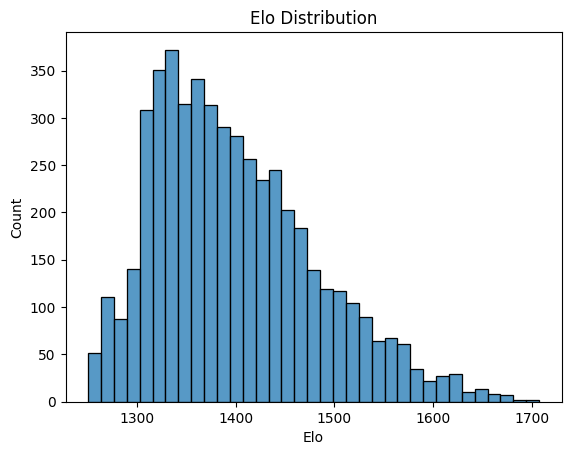

In [5]:
sns.histplot(elo_turncount_df['Elo'])
plt.title("Elo Distribution")
plt.show()

Based off the histogram, the elo distribution looks positively skewed.

But for a more quantifiable analysis, we conduct a Shapiro-Wilk test for normality.

* $H_0$: The data is not normally distributed
* $H_a$: The data is normally distributed

We set a significance level of $a = 0.05$.

In [6]:
statistic, p_value = stats.shapiro(elo_turncount_df['Elo'])

print(f"{p_value = }")

p_value = np.float64(4.0652666884807414e-35)


With a p-value of around $4.06 \times 10^{-35} (< a = 0.05)$,
we fail to reject $H_0$, i.e, elo is not normally distributed.

{{TODO: stuff about how this makes sense - Roymer said it's how elo really was
designed}}

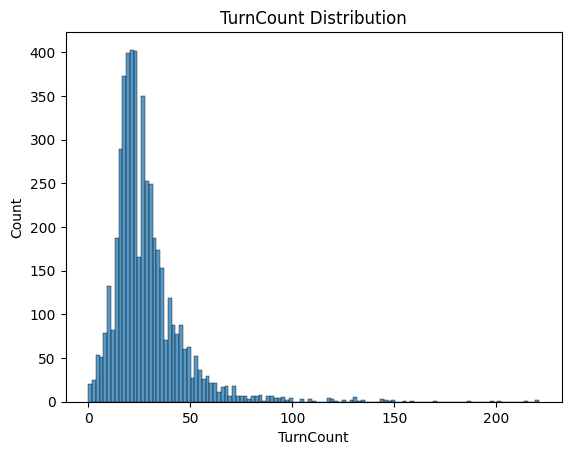

In [7]:
sns.histplot(elo_turncount_df['TurnCount'])
plt.title("TurnCount Distribution")
plt.show()

The turncount distribution appears positively skewed as well;
we again conduct a test for normality:

In [10]:
statistic, p_value = stats.shapiro(elo_turncount_df['TurnCount'])
print(f"{p_value = }")

p_value = np.float64(1.5540724126699347e-64)


With a p-value of around $1.55 \times 10^{-64} (< a = 0.05)$, we
reject $H_0$, i.e, turncount is normally distributed.

{{TODO: mention stalling tech? I'm not sure if we should standardize here}}

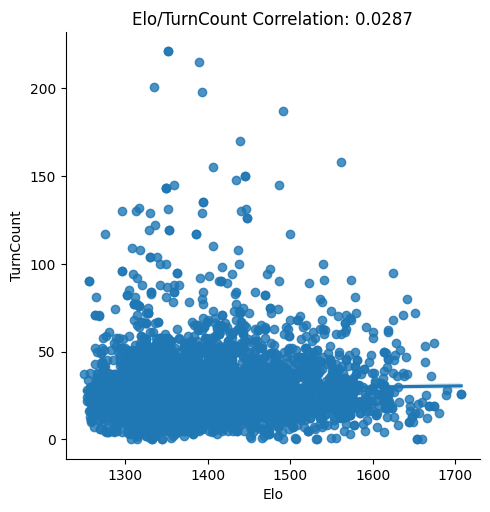

In [9]:
corr = elo_turncount_df.corr()['Elo']['TurnCount']
ax = sns.lmplot(x='Elo', y='TurnCount', data=elo_turncount_df)
plt.title(f"Elo/TurnCount Correlation: {corr:.4f}")
plt.show()

It would appear that there is very little correlation between elo and turncount.